# Assignment 1
Data Visualization

In [1]:
import numpy as np
import pandas as pd
import csv
import folium

from folium import plugins
from PIL import Image

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

data download link = https://www.kaggle.com/jboysen/london-crime

In [2]:
df_london = pd.read_csv('dataset/london_crime_by_lsoa.csv')
print(df_london.shape)
display(df_london.head())
display(df_london.tail())

(13490604, 7)


,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


# 1. Area Plot

In [3]:
df_gwcr = df_london[ ((df_london['borough'] == 'Greenwich') | (df_london['borough'] == 'Croydon')) & 
                        ((df_london['year']) | (df_london['value']))]

In [4]:
mpl.style.use(['ggplot'])

In [5]:
df_gwcr = df_gwcr.groupby(['borough', 'year'])[['major_category', 'minor_category', 'value']].max()
df_gwcr

major_category minor_category  value
borough   year                                                   
Croydon   2008  Violence Against the Person   Wounding/GBH     45
          2009  Violence Against the Person   Wounding/GBH     53
          2010  Violence Against the Person   Wounding/GBH     49
          2011  Violence Against the Person   Wounding/GBH     48
          2012  Violence Against the Person   Wounding/GBH     43
          2013  Violence Against the Person   Wounding/GBH     41
          2014  Violence Against the Person   Wounding/GBH     33
          2015  Violence Against the Person   Wounding/GBH     53
          2016  Violence Against the Person   Wounding/GBH     51
Greenwich 2008  Violence Against the Person   Wounding/GBH     37
          2009  Violence Against the Person   Wounding/GBH     42
          2010  Violence Against the Person   Wounding/GBH     23
          2011  Violence Against the Person   Wounding/GBH     98
          2012  Violence Against the Person   Wounding/GBH     69
          2013  Violence Against the Person   Wounding/GBH     35
          2014  Violence Against the Person   Wounding/GBH     23
          2015  Violence Against the Person   Wounding/GBH     28
          2016  Violence Against the Person   Wounding/GBH     37

Text(0.5, 0, 'Borough, Years')

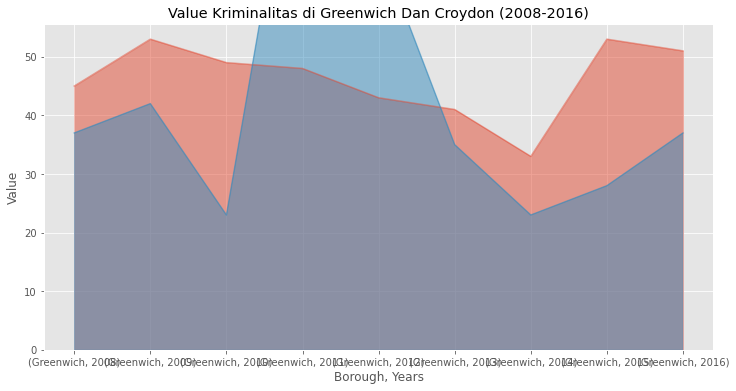

In [6]:
df_gwcr = df_gwcr.groupby('borough')['value']
df_gwcr.plot(kind='area', figsize=(12,6), stacked=False, alpha=0.5)

plt.title('Value Kriminalitas di Greenwich Dan Croydon (2008-2016)')
plt.ylabel('Value')
plt.xlabel('Borough, Years')

# 2. Histogram

In [7]:
df_gwcr = df_london[ ((df_london['borough'] == 'Greenwich') | (df_london['borough'] == 'Croydon')) & 
                        ((df_london['year']) | (df_london['value']))] 

In [8]:
df_gwcr = df_gwcr.groupby(['borough', 'year'])[['major_category', 'minor_category', 'value']].max()
df_gwcr

major_category minor_category  value
borough   year                                                   
Croydon   2008  Violence Against the Person   Wounding/GBH     45
          2009  Violence Against the Person   Wounding/GBH     53
          2010  Violence Against the Person   Wounding/GBH     49
          2011  Violence Against the Person   Wounding/GBH     48
          2012  Violence Against the Person   Wounding/GBH     43
          2013  Violence Against the Person   Wounding/GBH     41
          2014  Violence Against the Person   Wounding/GBH     33
          2015  Violence Against the Person   Wounding/GBH     53
          2016  Violence Against the Person   Wounding/GBH     51
Greenwich 2008  Violence Against the Person   Wounding/GBH     37
          2009  Violence Against the Person   Wounding/GBH     42
          2010  Violence Against the Person   Wounding/GBH     23
          2011  Violence Against the Person   Wounding/GBH     98
          2012  Violence Against the Person   Wounding/GBH     69
          2013  Violence Against the Person   Wounding/GBH     35
          2014  Violence Against the Person   Wounding/GBH     23
          2015  Violence Against the Person   Wounding/GBH     28
          2016  Violence Against the Person   Wounding/GBH     37

Text(0.5, 0, 'Value Kriminalitas')

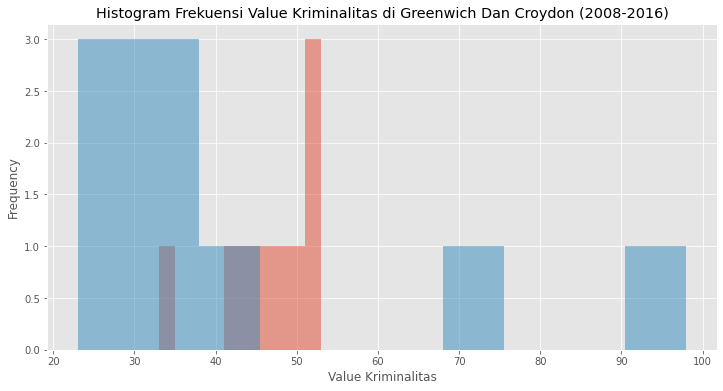

In [9]:
df_gwcr = df_gwcr.groupby('borough')['value']
df_gwcr.plot(kind='hist', figsize=(12,6), stacked=False, alpha=0.5)

plt.title('Histogram Frekuensi Value Kriminalitas di Greenwich Dan Croydon (2008-2016)')
plt.xlabel('Value Kriminalitas')

# 3. Bar Chart

Text(0.5, 0, 'Total Value Kriminalitas')

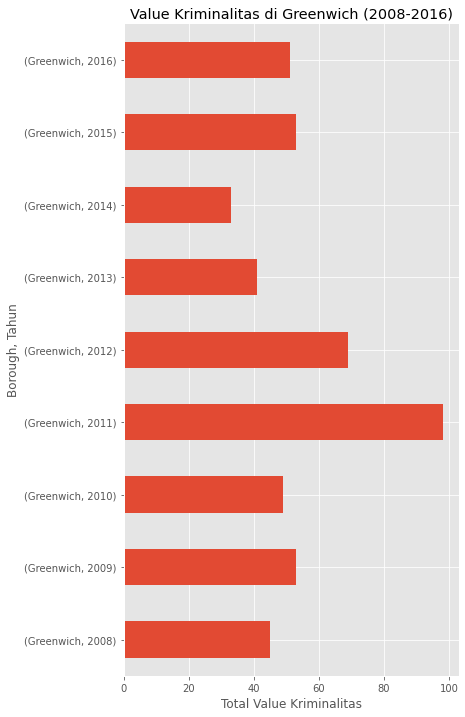

In [10]:
df_gwcr.plot(kind='barh', figsize=(6, 12))
plt.title("Value Kriminalitas di Greenwich (2008-2016)")
plt.ylabel("Borough, Tahun")
plt.xlabel("Total Value Kriminalitas")

# 4. Pie Chart

In [11]:
df_london['Total']= df_london.sum(axis=1)
df_london.head(5)

C:\Users\imans\AppData\Local\Temp\ipykernel_18148\2474925533.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_london['Total']= df_london.sum(axis=1)


,lsoa_code,borough,major_category,minor_category,value,year,month,Total
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11,2027
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11,2027
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5,2020
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3,2019
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6,2014


In [12]:
total_borough = df_london.groupby(['borough'])['Total'].sum()
total_borough

borough
Barking and Dagenham       627983687
Barnet                    1156473583
Bexley                     778584994
Brent                      990592465
Bromley                   1057692647
Camden                     764140139
City of London              19620600
Croydon                   1215599144
Ealing                    1109207388
Enfield                   1031978414
Greenwich                  850373768
Hackney                    843433383
Hammersmith and Fulham     663771171
Haringey                   835581608
Harrow                     738258076
Havering                   806731547
Hillingdon                 893565484
Hounslow                   799367440
Islington                  725291634
Kensington and Chelsea     599230485
Kingston upon Thames       523938500
Lambeth                   1047990566
Lewisham                   979462153
Merton                     686155360
Newham                     951823294
Redbridge                  899861308
Richmond upon Thames       613

In [13]:
total_borough = total_borough.head(5)
total_borough

borough
Barking and Dagenham     627983687
Barnet                  1156473583
Bexley                   778584994
Brent                    990592465
Bromley                 1057692647
Name: Total, dtype: int64

(-1.116467604460635,
 1.1007841716409825,
 -1.1223570857018659,
 1.1083245693703876)

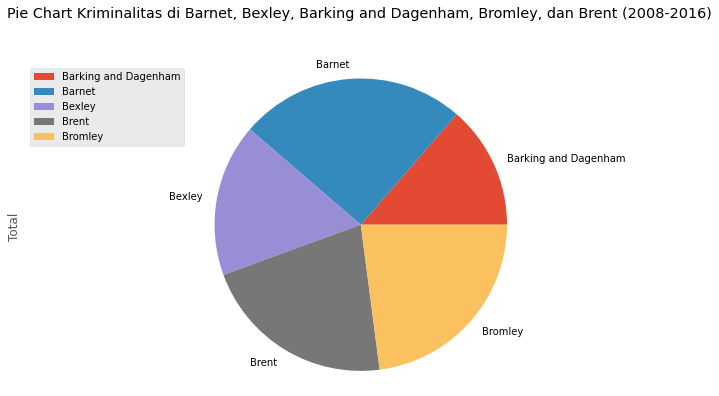

In [14]:
pie_borough = total_borough.plot(kind='pie', figsize=(12,6))

plt.title("Pie Chart Kriminalitas di Barnet, Bexley, Barking and Dagenham, Bromley, dan Brent (2008-2016)", y=1.12)
pie_borough.legend(labels=total_borough.index, loc="upper left")
pie_borough.axis('equal')

# 5. Box Plot

In [15]:
df_greenwich = df_london[ ((df_london['borough'] == 'Greenwich')) & 
                        ((df_london['year']) | (df_london['value']))]

In [16]:
df_greenwich = df_greenwich.groupby(['borough', 'year'])[['major_category', 'minor_category', 'value']].max()
df_greenwich

major_category minor_category  value
borough   year                                                   
Greenwich 2008  Violence Against the Person   Wounding/GBH     37
          2009  Violence Against the Person   Wounding/GBH     42
          2010  Violence Against the Person   Wounding/GBH     23
          2011  Violence Against the Person   Wounding/GBH     98
          2012  Violence Against the Person   Wounding/GBH     69
          2013  Violence Against the Person   Wounding/GBH     35
          2014  Violence Against the Person   Wounding/GBH     23
          2015  Violence Against the Person   Wounding/GBH     28
          2016  Violence Against the Person   Wounding/GBH     37

Text(0.5, 0, 'Value')

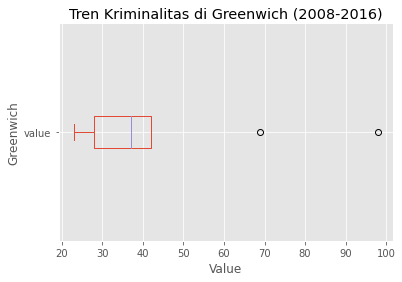

In [17]:
df_greenwich.plot(kind='box', vert=False)

plt.title("Tren Kriminalitas di Greenwich (2008-2016)")
plt.ylabel("Greenwich")
plt.xlabel("Value")

# 6. Scatter Plot

In [18]:
df_gwcr = df_london[ ((df_london['borough'] == 'Greenwich') | (df_london['borough'] == 'Croydon')) & 
                        ((df_london['year']) | (df_london['value']))]

In [19]:
df_gwcr = df_gwcr.groupby(['borough', 'year'])[['value']].max()
df_gwcr

value
borough   year       
Croydon   2008     45
          2009     53
          2010     49
          2011     48
          2012     43
          2013     41
          2014     33
          2015     53
          2016     51
Greenwich 2008     37
          2009     42
          2010     23
          2011     98
          2012     69
          2013     35
          2014     23
          2015     28
          2016     37

In [20]:
df_gwcr = df_gwcr.T
df_gwcr

borough Croydon                                         Greenwich            \
year       2008 2009 2010 2011 2012 2013 2014 2015 2016      2008 2009 2010   
value        45   53   49   48   43   41   33   53   51        37   42   23   

borough                                
year    2011 2012 2013 2014 2015 2016  
value     98   69   35   23   28   37

Text(0.5, 1.0, 'Korelasi Value Kriminalitas di Greenwich dan Croydon')

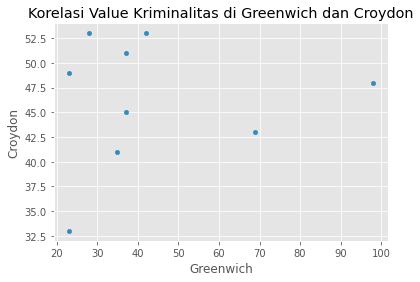

In [21]:
df_gwcr.plot(kind='scatter', x='Greenwich', y='Croydon')

plt.title("Korelasi Value Kriminalitas di Greenwich dan Croydon")

# 7. Word Clouds

In [22]:
df_wc = df_london.head(90)
df_wc

,lsoa_code,borough,major_category,minor_category,value,year,month,Total
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11,2027
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11,2027
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5,2020
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3,2019
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6,2014
...,...,...,...,...,...,...,...,...
85,E01002804,Islington,Theft and Handling,Theft/Taking Of Motor Vehicle,0,2016,6,2022
86,E01003483,Newham,Burglary,Burglary in Other Buildings,0,2015,2,2017
87,E01002193,Harrow,Robbery,Business Property,0,2013,12,2025
88,E01000507,Brent,Violence Against the Person,Assault with Injury,0,2009,5,2014


In [23]:
df_wc = df_wc['borough']
df_wc

0        Croydon
1      Greenwich
2        Bromley
3      Redbridge
4     Wandsworth
         ...    
85     Islington
86        Newham
87        Harrow
88         Brent
89       Bromley
Name: borough, Length: 90, dtype: object

In [24]:
df_wc = str(df_wc)

In [25]:
df_wordcloud = WordCloud()
df_wordcloud.generate(df_wc)

(-0.5, 399.5, 199.5, -0.5)

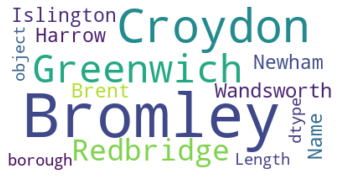

In [26]:
sw = list(STOPWORDS)
sw.append('said')

df_wordcloud = WordCloud(
    background_color = 'white',
    max_words = 200,
    stopwords = sw
)
df_wordcloud.generate(df_wc)

plt.imshow(df_wordcloud, 
           interpolation='bilinear'
          )
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

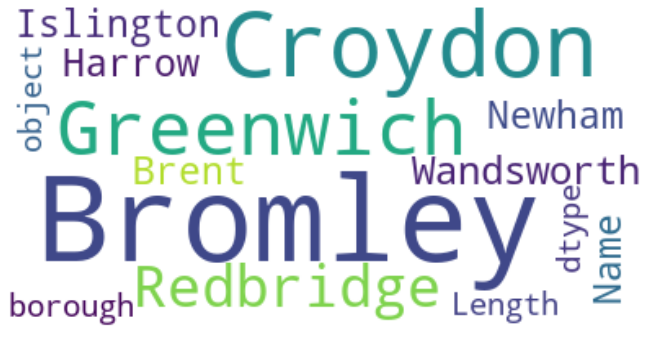

In [27]:
fig = plt.figure()
fig.set_figwidth(12)
fig.set_figheight(6)

plt.imshow(df_wordcloud, 
           interpolation='bilinear'
          )
plt.axis('off')

# 8. Follium

In [28]:
latitude = 51.50722
longitude = -0.1275

data borough_coordinates.xlsx ada di folder /dataset

In [31]:
borough_c = pd.read_excel("dataset/borough_coordinates.xlsx")
borough_c

,borough,Y,X
0,Barking and Dagenham,51.5607,0.1557
1,Barnet,51.6252,-0.1517
2,Bexley,51.4549,-0.1505
3,Brent,51.5588,-0.2817
4,Bromley,51.4039,0.0198
5,Camden,51.5290,-0.1255
6,Croydon,51.3714,-0.0977
7,Ealing,51.5130,-0.3089
8,Enfield,51.6538,-0.0799
9,Greenwich,51.4892,0.0648


In [30]:
borough_map = folium.map.FeatureGroup()

for x, y in zip(borough_c.Y, borough_c.X):
    borough_map.add_child(
            folium.CircleMarker([x,y],
                               radius=3,
                               color='blue',
                               fill=True,
                               fill_color='blue',
                               fill_opacity=1)
    )
    
london_map = folium.Map(location=[latitude, longitude], zoom_start=12)
london_map.add_child(borough_map)